In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Harris角点
计算公式：
$$E(u,v)=\sum_{x,y}{w(x,y)[I(x+u, y+v)-I(x,y)]^2}$$
其中窗口函数可以是正常的矩形窗口也可以是对每一个像素给予不同权重的高斯窗口。角点检测中要是$E(u,v)$的值最大。

$$E(u,v)=\sum_{x,y}{w(x,y)[I(x+u, y+v)-I(x,y)]^2}$$
$$=\sum_{x,y}{w(x,y)[I(x, y)+uI_x+vI_y-I(x,y)]^2}$$
$$=\sum_{x,y}{w(x,y)[uI_x+vI_y]^2}$$
$$=\sum_{x,y}{w(x,y)[(u, v)\left(\begin{matrix}I_x\\I_y\end{matrix}\right)]^2}$$
$$=\sum_{x,y}{w(x,y)(u, v)\left(\begin{matrix}I_x\\I_y\end{matrix}\right)\left(\begin{matrix}I_x &I_y\end{matrix}\right)\left(\begin{matrix}u\\v\end{matrix}\right)}$$
$$=(u,v)M\left(\begin{matrix}u\\v\end{matrix}\right)$$
$$M=\sum_{x,y}{w(x,y)\left(\begin{matrix}I_x\\I_y\end{matrix}\right)\left(\begin{matrix}I_x &I_y\end{matrix}\right)}$$

其中$I_x$和$I_y$是图像在$x$和$y$方向的导数。最后通过计算$M$矩阵的特征值，带入打分公式：
$$R=det(M)-k(trace(M))^2$$
$$det(M)=\lambda_1 \lambda_2$$
$$trace(M)=\lambda_1 + \lambda_2$$

所以Harris角点检测的结果是一个由角点分数构成的灰度图像。选取合适的阈值对结果图像进行二值化就检测到了图像中的角点。

In [2]:
# cv2.cornerHarris?

cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst

blockSize角点检测中要考虑的邻域大小，即划窗大小，ksize值Sobel求导中国年使用的窗口大小，k指Harris角点检测方程中的自由参数，取值参数为[0.04,0.06]。

In [3]:
img = cv2.imread('../../data/blox.jpg')

In [4]:
img.shape

(256, 256, 3)

In [5]:
img.dtype

dtype('uint8')

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
gray = np.float32(gray)

In [8]:
harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

In [9]:
# harris = cv2.dilate(harris, None)

In [10]:
harris.shape

(256, 256)

In [11]:
harris.dtype

dtype('float32')

In [12]:
# harris = (harris * 255).round().astype(np.uint8)

In [13]:
img[harris>0.01*harris.max()]=[255, 0, 0]

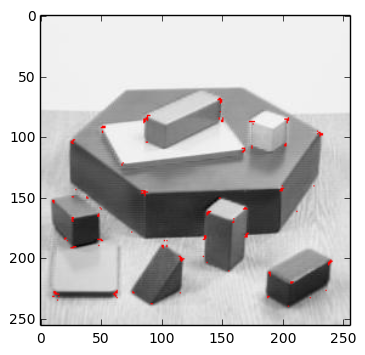

In [14]:
plt.imshow(img, cmap='gray')

# 亚像素级精确度的角点
有时我们需要最大精度的角点检测。OpenCV提供了函数cv2.cornerSubPix可以提供亚像素级别的角点检测。